In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 20})
df = pd.read_csv('CN_shap_220614.csv')

In [2]:
from rdkit import Chem
df_atom_contrib_model = pd.read_csv('prediction_results_noglobfeat.csv')
df_atom_contrib_model['total_atoms'] = [ Chem.MolFromSmiles(smi).GetNumHeavyAtoms() for smi in df_atom_contrib_model.Canonical_SMILES]

In [3]:
df2 = df_atom_contrib_model[(df_atom_contrib_model.total_atoms >=8 ) & (df_atom_contrib_model.total_atoms <= 24)]

In [4]:
df['can_smiles'] = [  Chem.MolToSmiles(Chem.MolFromSmiles(smi)) for smi in df['Canonical_SMILES']]
df2['can_smiles'] = [  Chem.MolToSmiles(Chem.MolFromSmiles(smi)) for smi in df2['Canonical_SMILES']]

/Users/kyj/opt/anaconda3/envs/ykim/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df = df.sort_values(by=['can_smiles'])
df2 = df2.sort_values(by=['can_smiles'])

In [6]:
df['predicted_atom_contrib_model'] = list(df2.predicted)
df['atom_contrib'] = list(df2['atom_contrib_vector'])
df['Canonical_SMILES_model_1'] = list(df2['Canonical_SMILES'])

In [7]:
import numpy as np 
df['AE_atom_contrib'] = np.abs(df.CN - df.predicted_atom_contrib_model)
df = df.sort_values(by=['AE_atom_contrib'], ascending = False)
df

,Canonical_SMILES,Device_tier,Train/Valid/Test,CN,predicted,glob_vector,total_atoms,atom_shap_total,atomwise_shap,can_smiles,predicted_atom_contrib_model,atom_contrib,Canonical_SMILES_model_1,AE_atom_contrib
52,COCCOCCOC,1,Train,54.6,57.529697,3.632428 15.735736 -8.668928 -3.786494 2.87274...,9,57.529697,[3.89679633 7.10969297 7.11831665 7.15548225 6...,COCCOCCOC,107.404440,48.060616 97.354057 126.322258 141.026505 141....,COCCOCCOC,52.804440
148,CCOCCCCOCC,3,Train,97.0,99.701220,6.089874 26.433155 -15.061565 -7.160985 5.2664...,10,99.701220,[ 3.71223611 8.27124105 10.85243543 13.591500...,CCOCCCCOCC,147.788480,58.339706 123.222748 163.880722 188.366562 205...,CCOCCCCOCC,50.788480
507,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,3,Train,102.0,64.363480,3.141770 16.292732 -10.423613 -4.996491 3.3201...,24,64.363480,[ 1.94288511 3.47410148 4.45183034 4.567090...,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,61.457882,22.212950 53.094746 79.018639 97.770355 105.31...,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,40.542118
152,COCCCCCCOC,3,Train,88.0,89.915020,5.277720 23.525225 -13.799187 -7.364309 4.6560...,10,89.915020,[ 3.73285164 7.1302995 9.79438247 11.579336...,COCCCCCCOC,124.350330,50.071850 103.419991 142.215454 158.173691 167...,COCCCCCCOC,36.350330
447,CCCCOC(=O)CCCCCCCC(=O)OCCCC,3,Train,83.0,80.106575,2.874376 21.912554 -12.110435 -4.342497 3.7974...,21,80.106575,[ 3.25586406 5.28395485 6.93482248 6.380533...,CCCCOC(=O)CCCCCCCC(=O)OCCCC,47.625343,29.591278 62.645756 73.713959 45.135838 21.020...,CCCCOC(=O)CCCCCCCC(=O)OCCCC,35.374657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,CCCCC1=CC=CO1,1,Train,13.1,12.979754,0.430403 3.579951 -2.096825 -1.454491 0.798967...,9,12.979754,[1.23879213 2.35293496 2.75694817 1.86683662 1...,CCCCc1ccco1,13.071246,18.075800 31.827032 12.539238 10.718135 15.427...,CCCCc1ccco1,0.028754
392,CCCCCCCCCC(=O)OCCCCCC,3,Train,64.0,67.126274,3.233400 17.251877 -11.047762 -5.476122 3.5131...,18,67.126274,[ 2.14785469 4.03614203 5.93646991 7.357996...,CCCCCCCCCC(=O)OCCCCCC,64.025040,22.212950 53.094746 79.018639 97.702057 119.91...,CCCCCCCCCC(=O)OCCCCCC,0.025040
141,C1CC2C3CCC(C3)C2C1,1,Train,20.4,19.537144,1.615965 5.413381 -2.869750 -1.800225 0.958880...,10,19.537144,[1.22296122 1.61147586 2.46033932 2.37840765 1...,C1CC2C3CCC(C3)C2C1,20.377682,10.759235 13.157394 26.748533 27.232958 18.629...,C1CC2C3CCC(C3)C2C1,0.022318
77,CC1=CC=C(C=C1)OC,1,Train,7.4,7.052500,0.284218 2.921006 -1.375060 -0.310235 0.224907...,9,7.052500,[0.11720524 0.32357818 0.51094441 0.96792792 1...,COc1ccc(C)cc1,7.409522,24.816557 25.989037 -5.568086 1.038970 4.39348...,COc1ccc(C)cc1,0.009522


In [8]:
contrib_shap_corr = []
Atom_contrib = []
Shap_contrib = []
for _, row in df.iterrows():
    atom_contrib = np.array([float(x) for x in row['atom_contrib'].split()][0:row['total_atoms']]) / row['total_atoms']
    shap_contrib = np.array([float(x) for x in row['atomwise_shap'].replace('\n','')[1:-1].split()])
    contrib_shap_corr.append(np.corrcoef(atom_contrib, shap_contrib)[0][1])  
    Atom_contrib.append(atom_contrib)
    Shap_contrib.append(shap_contrib)
df['contrib_shap_corr'] = contrib_shap_corr
df['Atom_contrib'] = Atom_contrib
df['Shap_contrib'] = Shap_contrib

/Users/kyj/opt/anaconda3/envs/ykim/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


In [9]:
df = df.sort_values(by=['AE_atom_contrib'], ascending = False)

In [10]:
df

,Canonical_SMILES,Device_tier,Train/Valid/Test,CN,predicted,glob_vector,total_atoms,atom_shap_total,atomwise_shap,can_smiles,predicted_atom_contrib_model,atom_contrib,Canonical_SMILES_model_1,AE_atom_contrib,contrib_shap_corr,Atom_contrib,Shap_contrib
52,COCCOCCOC,1,Train,54.6,57.529697,3.632428 15.735736 -8.668928 -3.786494 2.87274...,9,57.529697,[3.89679633 7.10969297 7.11831665 7.15548225 6...,COCCOCCOC,107.404440,48.060616 97.354057 126.322258 141.026505 141....,COCCOCCOC,52.804440,0.890376,"[5.340068444444444, 10.817117444444444, 14.035...","[3.89679633, 7.10969297, 7.11831665, 7.1554822..."
148,CCOCCCCOCC,3,Train,97.0,99.701220,6.089874 26.433155 -15.061565 -7.160985 5.2664...,10,99.701220,[ 3.71223611 8.27124105 10.85243543 13.591500...,CCOCCCCOCC,147.788480,58.339706 123.222748 163.880722 188.366562 205...,CCOCCCCOCC,50.788480,0.992734,"[5.8339706, 12.322274799999999, 16.3880722, 18...","[3.71223611, 8.27124105, 10.85243543, 13.59150..."
507,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,3,Train,102.0,64.363480,3.141770 16.292732 -10.423613 -4.996491 3.3201...,24,64.363480,[ 1.94288511 3.47410148 4.45183034 4.567090...,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,61.457882,22.212950 53.094746 79.018639 97.770355 105.31...,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,40.542118,0.868112,"[0.9255395833333333, 2.2122810833333335, 3.292...","[1.94288511, 3.47410148, 4.45183034, 4.5670901..."
152,COCCCCCCOC,3,Train,88.0,89.915020,5.277720 23.525225 -13.799187 -7.364309 4.6560...,10,89.915020,[ 3.73285164 7.1302995 9.79438247 11.579336...,COCCCCCCOC,124.350330,50.071850 103.419991 142.215454 158.173691 167...,COCCCCCCOC,36.350330,0.993415,"[5.007185, 10.341999099999999, 14.2215454, 15....","[3.73285164, 7.1302995, 9.79438247, 11.5793361..."
447,CCCCOC(=O)CCCCCCCC(=O)OCCCC,3,Train,83.0,80.106575,2.874376 21.912554 -12.110435 -4.342497 3.7974...,21,80.106575,[ 3.25586406 5.28395485 6.93482248 6.380533...,CCCCOC(=O)CCCCCCCC(=O)OCCCC,47.625343,29.591278 62.645756 73.713959 45.135838 21.020...,CCCCOC(=O)CCCCCCCC(=O)OCCCC,35.374657,0.848160,"[1.4091084761904762, 2.983131238095238, 3.5101...","[3.25586406, 5.28395485, 6.93482248, 6.3805331..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,CCCCC1=CC=CO1,1,Train,13.1,12.979754,0.430403 3.579951 -2.096825 -1.454491 0.798967...,9,12.979754,[1.23879213 2.35293496 2.75694817 1.86683662 1...,CCCCc1ccco1,13.071246,18.075800 31.827032 12.539238 10.718135 15.427...,CCCCc1ccco1,0.028754,0.605433,"[2.0084222222222223, 3.5363368888888886, 1.393...","[1.23879213, 2.35293496, 2.75694817, 1.8668366..."
392,CCCCCCCCCC(=O)OCCCCCC,3,Train,64.0,67.126274,3.233400 17.251877 -11.047762 -5.476122 3.5131...,18,67.126274,[ 2.14785469 4.03614203 5.93646991 7.357996...,CCCCCCCCCC(=O)OCCCCCC,64.025040,22.212950 53.094746 79.018639 97.702057 119.91...,CCCCCCCCCC(=O)OCCCCCC,0.025040,0.915360,"[1.2340527777777777, 2.949708111111111, 4.3899...","[2.14785469, 4.03614203, 5.93646991, 7.3579963..."
141,C1CC2C3CCC(C3)C2C1,1,Train,20.4,19.537144,1.615965 5.413381 -2.869750 -1.800225 0.958880...,10,19.537144,[1.22296122 1.61147586 2.46033932 2.37840765 1...,C1CC2C3CCC(C3)C2C1,20.377682,10.759235 13.157394 26.748533 27.232958 18.629...,C1CC2C3CCC(C3)C2C1,0.022318,0.965506,"[1.0759235, 1.3157394, 2.6748532999999997, 2.7...","[1.22296122, 1.61147586, 2.46033932, 2.3784076..."
77,CC1=CC=C(C=C1)OC,1,Train,7.4,7.052500,0.284218 2.921006 -1.375060 -0.310235 0.224907...,9,7.052500,[0.11720524 0.32357818 0.51094441 0.96792792 1...,COc1ccc(C)cc1,7.409522,24.816557 25.989037 -5.568086 1.038970 4.39348...,COc1ccc(C)cc1,0.009522,-0.406961,"[2.757395222222222, 2.8876707777777777, -0.618...","[0.11720524, 0.32357818, 0.51094441, 0.9679279..."


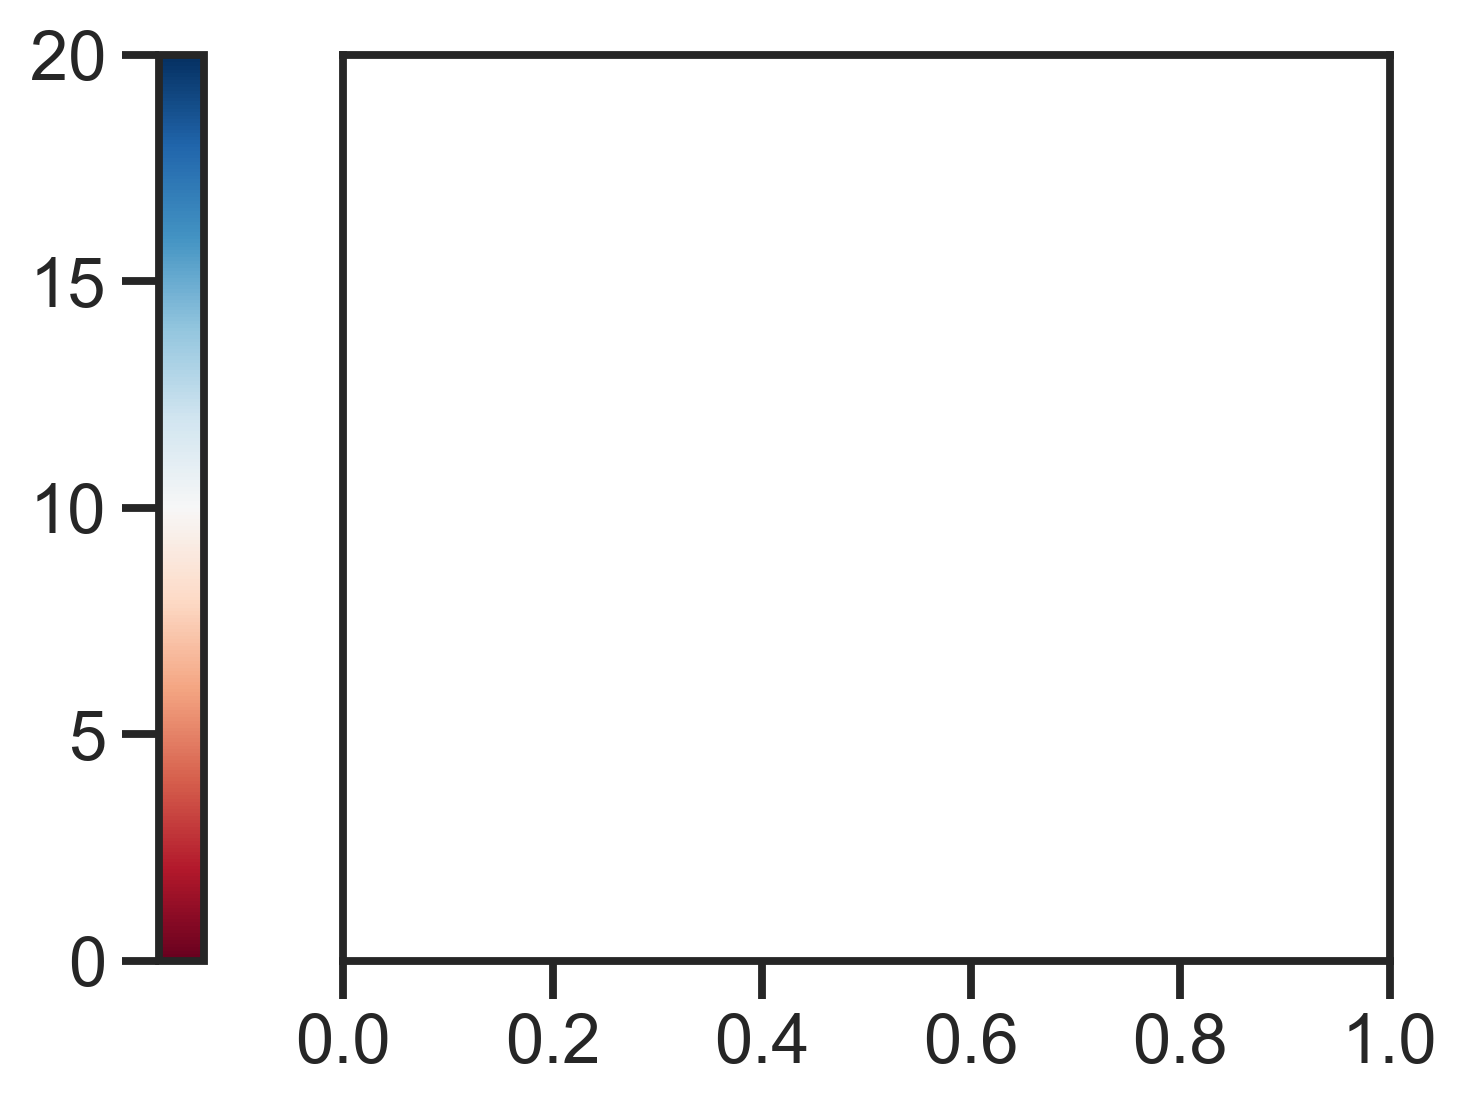

In [11]:
from IPython.display import display, SVG, HTML
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D


norm = mpl.colors.Normalize(
    vmin=0,
    vmax=20)
cmap = cm.RdBu
m = cm.ScalarMappable(norm=norm, cmap=cmap)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks([])
plt.colorbar(m, ax=[ax], location='left')

rgb2hex = lambda r,g,b: f"#{r:02x}{g:02x}{b:02x}"

def get_color(x):
    return m.to_rgba(float(x))
    #rgba = np.asarray(m.to_rgba(float(x)))
    #return tuple(rgba[:-1])

def draw_mol_svg(mol_str, color_dict, prop, figsize=(600, 600)):
    mol = Chem.MolFromSmiles(mol_str)
    
    '''
    for i, atom in enumerate(mol.GetAtoms()):
        atom.SetProp("atomNote", '%.1f' % prop[i] )
    '''
    
    mc = Chem.Mol(mol.ToBinary())
    Chem.Kekulize(mc)
    rdDepictor.Compute2DCoords(mc)

    drawer = rdMolDraw2D.MolDraw2DSVG(*figsize)
    #drawer.drawOptions().minFontSize = 80
    drawer.SetFontSize(40)
    
    '''
    opts = drawer.drawOptions()
    for i in range(mol.GetNumAtoms()):
        opts.atomLabels[i] = mol.GetAtomWithIdx(i).GetSymbol() + ' ' + '%.1f' % prop[i]
    '''
    
    n_atoms = len(mol.GetAtoms())
    assert n_atoms == len(color_dict), "{} atoms in mol, {} colors".format(n_atoms, len(color_dict))

    if color_dict is not None:
        drawer.DrawMolecule(
            mc, highlightAtoms=range(len(color_dict.keys())),
            highlightAtomColors=color_dict,
            highlightBonds=False)

    else:
        drawer.DrawMolecule(mc)

    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    svg = svg.replace('svg:', '').replace(':svg', '')
    return svg

def draw_shap(row):
    norm = mpl.colors.Normalize(
    #vmin= min(row['Shap_contrib']) - ( abs(min(row['Shap_contrib'])) * 0.2 ),
    #vmax= max(row['Shap_contrib']) + ( abs(max(row['Shap_contrib'])) * 0.2 ) 
    vmin = 0.0,
    vmax = 20.0
    )
    cmap = cm.RdBu
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    
    svg = draw_mol_svg(
        row['Canonical_SMILES'],
        {i: m.to_rgba(row['Shap_contrib'][i]) for i in range(len(row['Shap_contrib'])) },
        row['Shap_contrib']
    )
    #return svg
    
    t = svg.split('\n')
    #t.insert(-2, f'<text x="0" y="485">{row["Canonical_SMILES"]}</text>')
    t.insert(-2, f'<text x="0" y="600">Measured: {row["CN"]:.1f}, Predicted: {row["predicted"]:.1f}</text>')
    return SVG('\n'.join(t))

def draw_atom_contrib(row):
    norm = mpl.colors.Normalize(
    #vmin= min(row['Atom_contrib']) - ( abs(min(row['Atom_contrib'])) * 0.2 ),
    #vmax= max(row['Atom_contrib']) + ( abs(max(row['Atom_contrib'])) * 0.2 ) 
    vmin = 0.0,
    vmax = 20.0
    )
    cmap = cm.RdBu
    m = cm.ScalarMappable(norm=norm, cmap=cmap)    

    svg = draw_mol_svg(
        row['Canonical_SMILES_model_1'],
        {i: m.to_rgba(row['Atom_contrib'][i]) for i in range(len(row['Atom_contrib'])) },
        row['Atom_contrib']
    )
    #return svg
    
    t = svg.split('\n')
    #t.insert(-2, f'<text x="0" y="485">{row["Canonical_SMILES"]}</text>')
    t.insert(-2, f'<text x="0" y="600">Measured: {row["CN"]:.1f}, Predicted: {row["predicted_atom_contrib_model"]:.1f}</text>')
    return SVG('\n'.join(t))

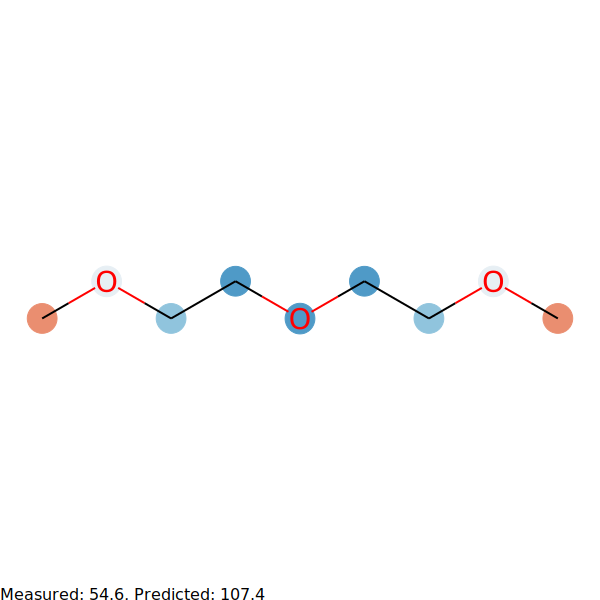

In [23]:
for _, row in df.iterrows():
    #if row['can_smiles'] == Chem.MolToSmiles(Chem.MolFromSmiles('CCCCOCCCC')):
    #if row['can_smiles'] == Chem.MolToSmiles(Chem.MolFromSmiles('CCOCCCCOCC')):
    #if row['can_smiles'] == Chem.MolToSmiles(Chem.MolFromSmiles('COCCCCCCOC')):
    if row['can_smiles'] == Chem.MolToSmiles(Chem.MolFromSmiles('COCCOCCOC')):
        display(draw_atom_contrib(row))

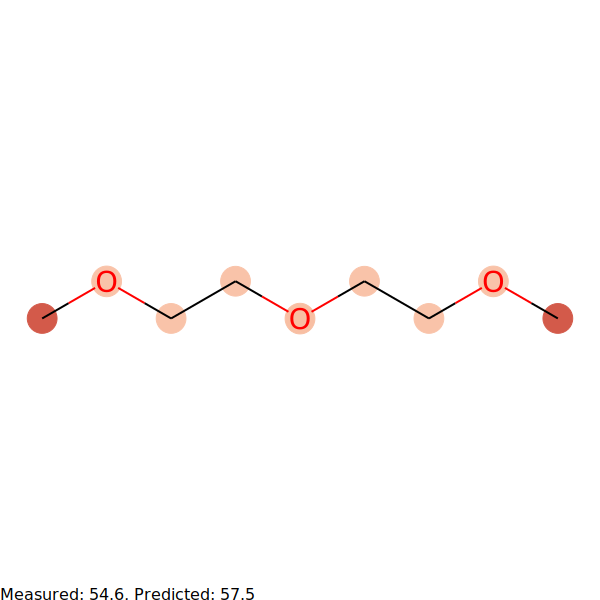

In [24]:
for _, row in df.iterrows():
    #if row['can_smiles'] == Chem.MolToSmiles(Chem.MolFromSmiles('CCCCOCCCC')):
    #if row['can_smiles'] == Chem.MolToSmiles(Chem.MolFromSmiles('CCOCCCCOCC')):
    #if row['can_smiles'] == Chem.MolToSmiles(Chem.MolFromSmiles('COCCCCCCOC')):
    if row['can_smiles'] == Chem.MolToSmiles(Chem.MolFromSmiles('COCCOCCOC')):
        display(draw_shap(row))

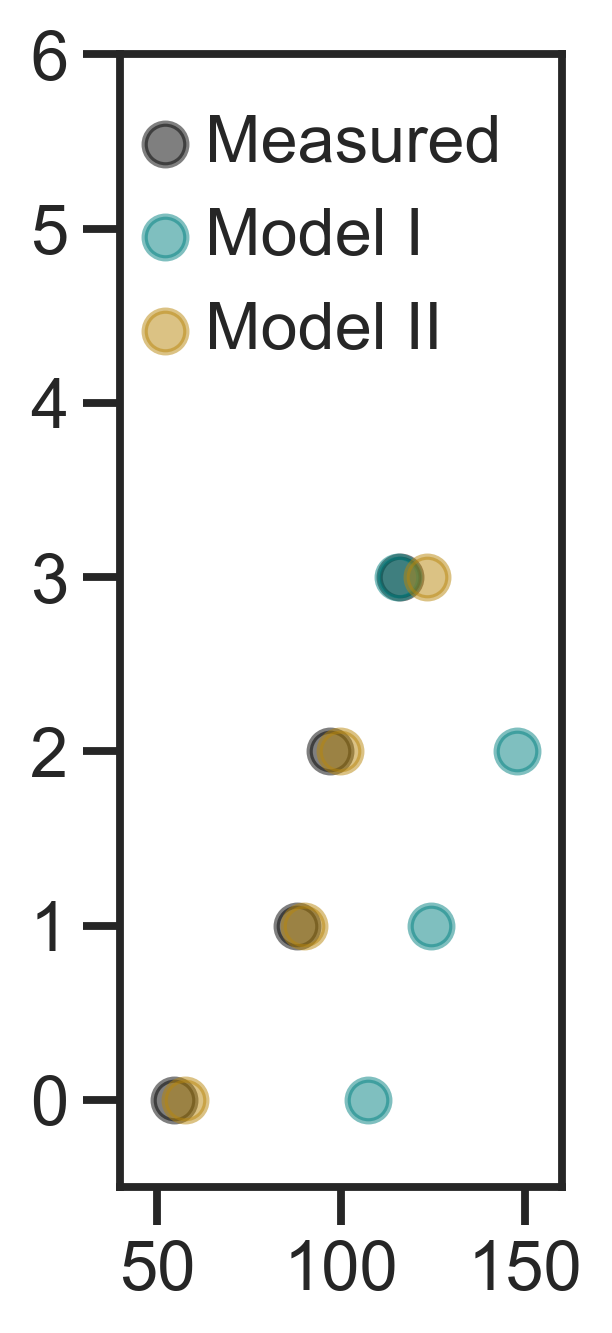

In [25]:
plt.rcParams["figure.figsize"] = (1.9,5)
plt.xlim([40,160])
plt.ylim([-0.5,6])

#plt.plot([50,150],[0,0], linewidth=1, color = 'black', ls = '--', zorder=-1, alpha = 0.5)

plt.scatter([116.1, 97.0, 88.0, 54.6],[3,2,1,0],  
            color = 'black', s=100, alpha = 0.5, label = 'Measured', zorder=10)
plt.scatter([115.4, 147.8, 124.4, 107.4],[3,2, 1,0],  
            color = 'teal', s=100, alpha = 0.5, label = 'Model I', zorder=10)
plt.scatter([123.4, 99.7, 89.9, 57.5],[3,2,1,0],  
            color = 'darkgoldenrod', s=100, alpha = 0.5, label = 'Model II', zorder=10)
plt.legend(handletextpad=-0.4, prop = {'size':16})